# **Import Libraries**

In [16]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.models import Sequential
import matplotlib.pyplot as plt

# **Load Data Set**

In [4]:
(X_train,y_train) , (X_test,y_test)=tf.keras.datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [5]:
X_train.shape , y_train.shape , X_test.shape , y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

* **Reshape the size of image and add 1 for balck & white image and add 3 for Colored image**

In [6]:
X_train=X_train.reshape(X_train.shape+(1,))
X_test=X_test.reshape(X_test.shape+(1,))

* **we add 1 because images are black and white**

In [7]:
X_train.shape , y_train.shape , X_test.shape , y_test.shape

((60000, 28, 28, 1), (60000,), (10000, 28, 28, 1), (10000,))

# **Normalize the image**

In [8]:
X_train=X_train/255
X_test=X_test/255

In [9]:
X_train=X_train.astype('float32')
X_test=X_test.astype('float32')

# **Build Model**

In [27]:
input_layer=Input(shape=(28,28,1))

model=Sequential([
    input_layer,
    layers.Conv2D(filters=10,kernel_size=(3,3),activation='relu'),
    layers.Conv2D(filters=10,kernel_size=(3,3),activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(filters=10,kernel_size=(3,3),activation='relu'),
    layers.Conv2D(filters=10,kernel_size=(3,3),activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.Flatten(),
    layers.Dense(10,activation='softmax')
])
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_21 (Conv2D)              │ (None, 26, 26, 10)     │           100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_22 (Conv2D)              │ (None, 24, 24, 10)     │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 12, 12, 10)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_23 (Conv2D)              │ (None, 10, 10, 10)     │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_24 (Conv2D)              │ (None, 8, 8, 10)       │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 4, 4, 10)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 160)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         1,610 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,440 (17.34 KB)

 Trainable params: 4,440 (17.34 KB)

 Non-trainable params: 0 (0.00 B)

# **Compile Model**

In [28]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [32]:
history=model.fit(X_train,y_train,epochs=5, validation_split=0.2,verbose=1)

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 40s 25ms/step - accuracy: 0.7950 - loss: 0.6345 - val_accuracy: 0.9658 - val_loss: 0.1152
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 41s 25ms/step - accuracy: 0.9652 - loss: 0.1123 - val_accuracy: 0.9743 - val_loss: 0.0877
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 38s 25ms/step - accuracy: 0.9736 - loss: 0.0843 - val_accuracy: 0.9787 - val_loss: 0.0725
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 38s 25ms/step - accuracy: 0.9777 - loss: 0.0676 - val_accuracy: 0.9814 - val_loss: 0.0679
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 41s 25ms/step - accuracy: 0.9812 - loss: 0.0589 - val_accuracy: 0.9821 - val_loss: 0.0616


# **Evaluate Model**

In [33]:
loss,accuracy=model.evaluate(X_test,y_test)
print(f'Test Loss: {loss}')
print(f'Test Accuracy: {accuracy}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9820 - loss: 0.0597
Test Loss: 0.04615487530827522
Test Accuracy: 0.9854999780654907


# **Prediction**

The label for imageis: 7


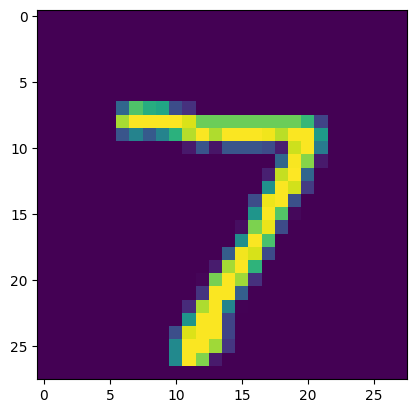

In [38]:
new=X_test[0]
plt.imshow(new.reshape(28,28))
# Display the label instead of using imshow
print(f"The label for image is: {y_test[0]}")

The label for image is: 1


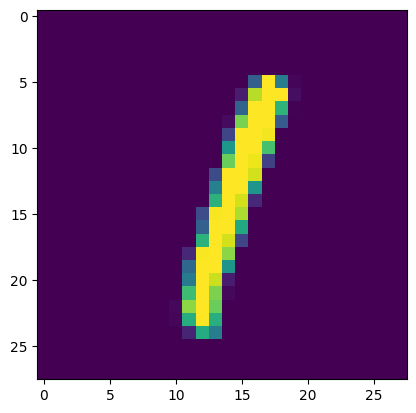

In [39]:
new=X_test[5]
plt.imshow(new.reshape(28,28))
# Display the label instead of using imshow
print(f"The label for image is: {y_test[5]}")

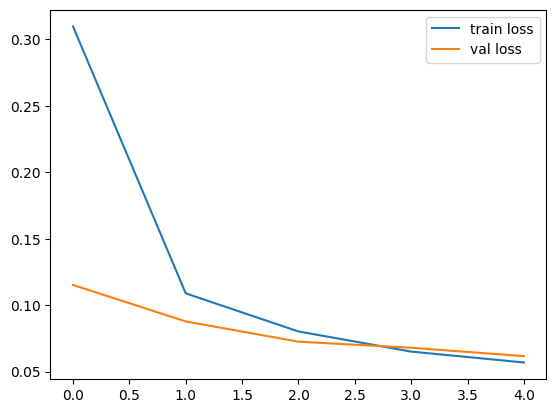

In [43]:
plt.plot(history.history['loss'],label='train loss')
plt.plot(history.history['val_loss'],label='val loss')
plt.legend()
plt.show()